In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('images/lenna.png')

In [3]:
shear_x = 0.40  # Shearing of x-axis
shear_y = 0.25  # Shearing of y-axis

M = np.array([[1, shear_x, 0],
              [shear_y, 1, 0],
              [0, 0, 1]])

In [4]:
M

array([[1.  , 0.4 , 0.  ],
       [0.25, 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [5]:
rows, cols, _ = img.shape

In [6]:
# Translation matrix
T = np.float32([[1,0,0],[0,1,150]])

In [7]:
T

array([[  1.,   0.,   0.],
       [  0.,   1., 150.]], dtype=float32)

In [8]:
img_tra = cv2.warpAffine(img, T, (int(cols*1.5), int(rows*1.5)))

In [9]:
cv2.imshow("Shifted Image", img_tra)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
img_tra.shape

(768, 768, 3)

In [12]:
img_she = cv2.warpPerspective(img_tra, M, (int(cols*1.5), int(rows*1.5)))

In [14]:
cv2.imshow("Sheared Image", img_she)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
shear_x = 0.40  # Shearing of x-axis
shear_y = -0.25  # Shearing of y-axis

M = np.array([[1, shear_x, 0],
              [shear_y, 1, 0],
              [0, 0, 1]])

In [16]:
img_she = cv2.warpPerspective(img_tra, M, (int(cols*1.5), int(rows*1.5)))

In [17]:
cv2.imshow("Sheared Image", img_she)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Shearing using scikit-image

In [19]:
from skimage import transform
from skimage import io

In [20]:
img_sk = io.imread("images/lenna.png")

In [21]:
shear_x = 0.40  # Shearing of x-axis
shear_y = -0.25  # Shearing of y-axis

In [22]:
tform = transform.AffineTransform(shear=(shear_x, shear_y))

In [24]:
img_sheared = transform.warp(img_sk, tform)

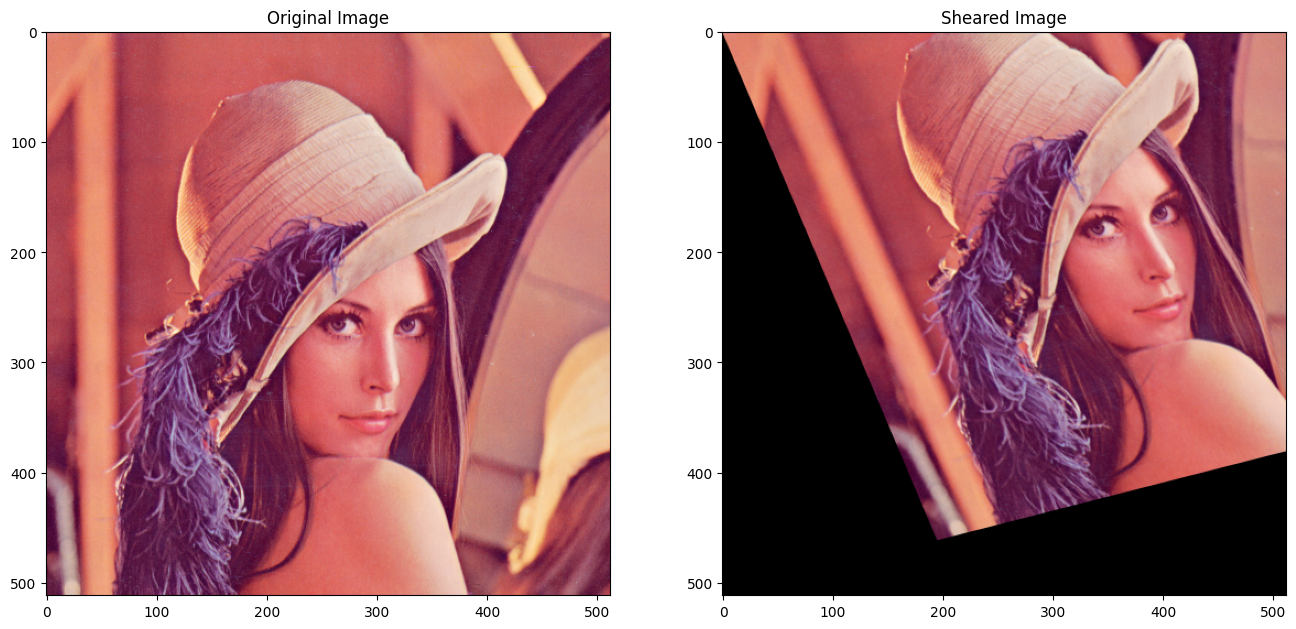

In [26]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_sk)
plt.subplot(1,2,2)
plt.title("Sheared Image")
plt.imshow(img_sheared)

In [27]:
help(transform.AffineTransform)

Help on class AffineTransform in module skimage.transform._geometric:

class AffineTransform(ProjectiveTransform)
 |  AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=None, *, dimensionality=2)
 |  
 |  Affine transformation.
 |  
 |  Has the following form::
 |  
 |      X = a0 * x + a1 * y + a2
 |        =   sx * x * [cos(rotation) + tan(shear_y) * sin(rotation)]
 |          - sy * y * [tan(shear_x) * cos(rotation) + sin(rotation)]
 |          + translation_x
 |  
 |      Y = b0 * x + b1 * y + b2
 |        =   sx * x * [sin(rotation) - tan(shear_y) * cos(rotation)]
 |          - sy * y * [tan(shear_x) * sin(rotation) - cos(rotation)]
 |          + translation_y
 |  
 |  where ``sx`` and ``sy`` are scale factors in the x and y directions.
 |  
 |  This is equivalent to applying the operations in the following order:
 |  
 |  1. Scale
 |  2. Shear
 |  3. Rotate
 |  4. Translate
 |  
 |  The homogeneous transformation matrix is::
 |  
 |      [[a0  a1  a2]

##### Affine Transformation

In [29]:
# Define transformation parameters
# Translation
tx = 50  # Translation along x-axis
ty = 100 # Translation along x-axis

# Rotation
angle = 45    # Angle of rotation

# Scaling 
scale = 1.2   # Scaling on both axis

# Shearing 
shear_x = 0.3    # tilt on x-axis
shear_y = 0.25   # tilt on y-axis

In [32]:
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x, tx],
                [shear_y, scale * np.sin(np.radians(angle)), ty]])

In [33]:
M

array([[  0.84852815,   0.3       ,  50.        ],
       [  0.25      ,   0.84852815, 100.        ]], dtype=float32)

In [39]:
img_affine = cv2.warpAffine(img, M, (768, 768))

In [40]:
cv2.imshow("Affine Transformed Image", img_affine)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
import cv2
import numpy as np

img = cv2.imread('images/lenna.png')

# Define transformation parameters
tx = 150  # Translation along x-axis
ty = 120  # Translation along y-axis
angle = 45  # Rotation angle in degrees
scale = 0.8  # Scaling factor
shear_x = -0.3  # Shearing along x-axis
shear_y = 0.2  # Shearing along y-axis

# Create transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)), shear_x, tx],
                [shear_y, scale * np.sin(np.radians(angle)), ty]])

# Apply transformation using warpAffine
img_affine = cv2.warpAffine(img, M, (512, 512))

# Display original and affine transformed images
cv2.imshow('Affine Transformed Image', img_affine)
cv2.waitKey(0)
cv2.destroyAllWindows()

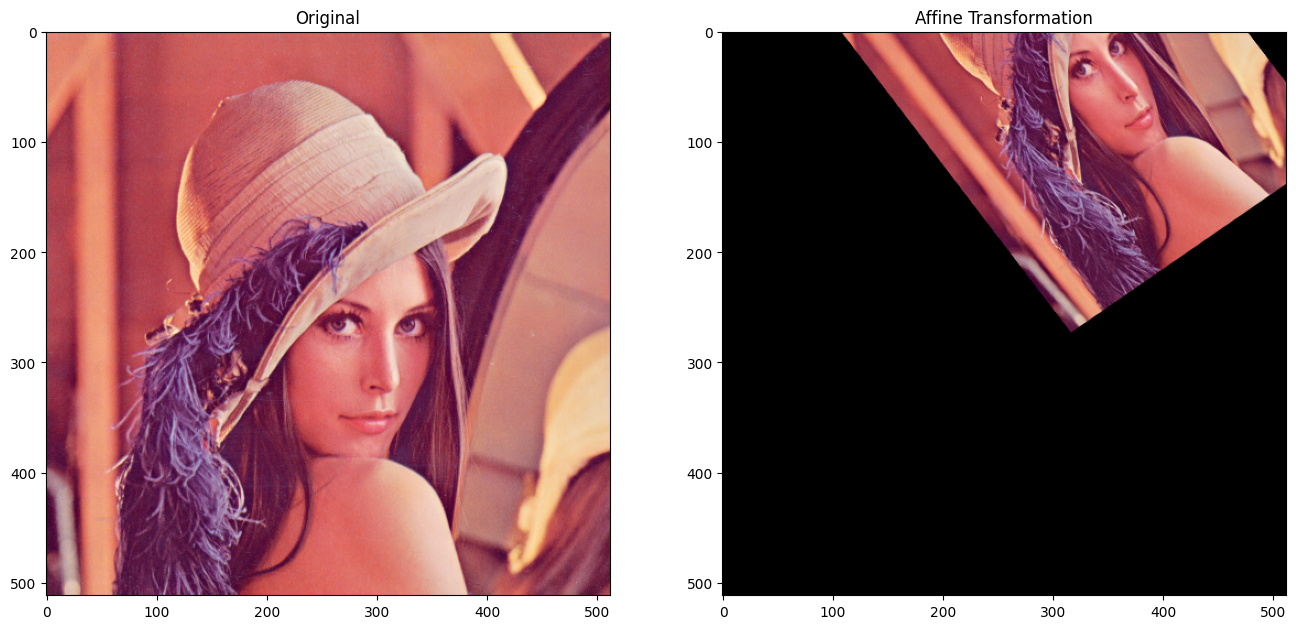

In [73]:
img_sk = io.imread('images/lenna.png')

# Define transformation parameters
tx = -150  # Translation along x-axis
ty = -10  # Translation along y-axis
angle = 45  # Rotation angle in degrees
scale = 1.5  # Scaling factor
shear_x = 0  # Shearing along x-axis
shear_y = 0.3 # Shearing along y-axis

tform = transform.AffineTransform(scale=(scale, scale),
                                 rotation=np.radians(angle),
                                 translation=(tx, ty),
                                 shear=(shear_x, shear_y))

img_aff = transform.warp(img_sk, tform)

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("Original")
plt.imshow(img_sk)
plt.subplot(122)
plt.title("Affine Transformation")
plt.imshow(img_aff)

In [74]:
import cv2
import numpy as np

img = cv2.imread('images/lenna.png')  # Load image

# Define source and destination points (4 corresponding points)
source_points = np.array([[100, 50], [200, 50], [200, 150], [100, 150]], dtype=np.float32)
destination_points = np.array([[50, 50], [250, 50], [250, 250], [50, 250]], dtype=np.float32)

# Compute transformation matrix
M = cv2.findHomography(source_points, destination_points)[0]

# Apply transformation using warpPerspective
img_transformed = cv2.warpPerspective(img, M, (1024, 1024))

# Display original and transformed images
cv2.imshow('Original Image', img)
cv2.imshow('Projectively Transformed Image', img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Projective Transformation

In [120]:
img = cv2.imread('images/lenna.png')  # Load image

In [121]:
h, w, _ = img.shape

In [122]:
# Define the source points
pts1 = np.int32([
    [250, 150],  # Top-left
    [370, 100],  # Top-Right
    [400, 400],  # Bottom-left
    [200, 400],  # Bottom-right
])

In [123]:
new_height, new_width = 768, 768 

In [132]:
# Define Destination points
pts2 = np.float32([
    [10,10],       # Top-left
    [new_width, 0],  # Top-Right
    [new_width, new_height], # Bottom-Right
    [0, new_height]
])

In [133]:
H, _ = cv2.findHomography(pts1, pts2)

In [134]:
H

array([[-7.30746269e+01, -1.42567164e+01,  2.03176119e+04],
       [-1.87701493e+01, -4.68394030e+01,  1.16288955e+04],
       [-2.44402985e-02, -2.56343284e-02,  1.00000000e+00]])

In [135]:
img_proj = cv2.warpPerspective(img, H, (new_width, new_height))

In [136]:
img_rgb = cv2.cvtColor(img_proj, cv2.COLOR_BGR2RGB)
img_ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

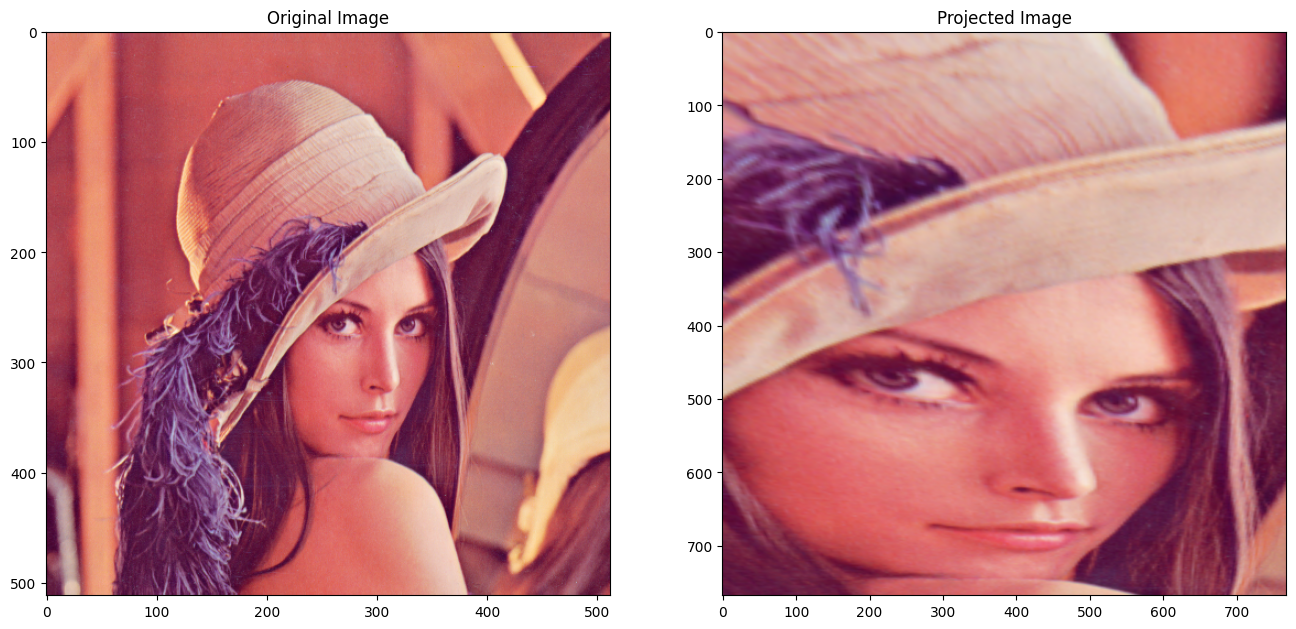

In [137]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img_ori)
plt.subplot(122)
plt.title("Projected Image")
plt.imshow(img_rgb)

In [138]:
for i in range(4):
    cv2.circle(img_ori, pts1[i], 5, (255,255,0), -1)

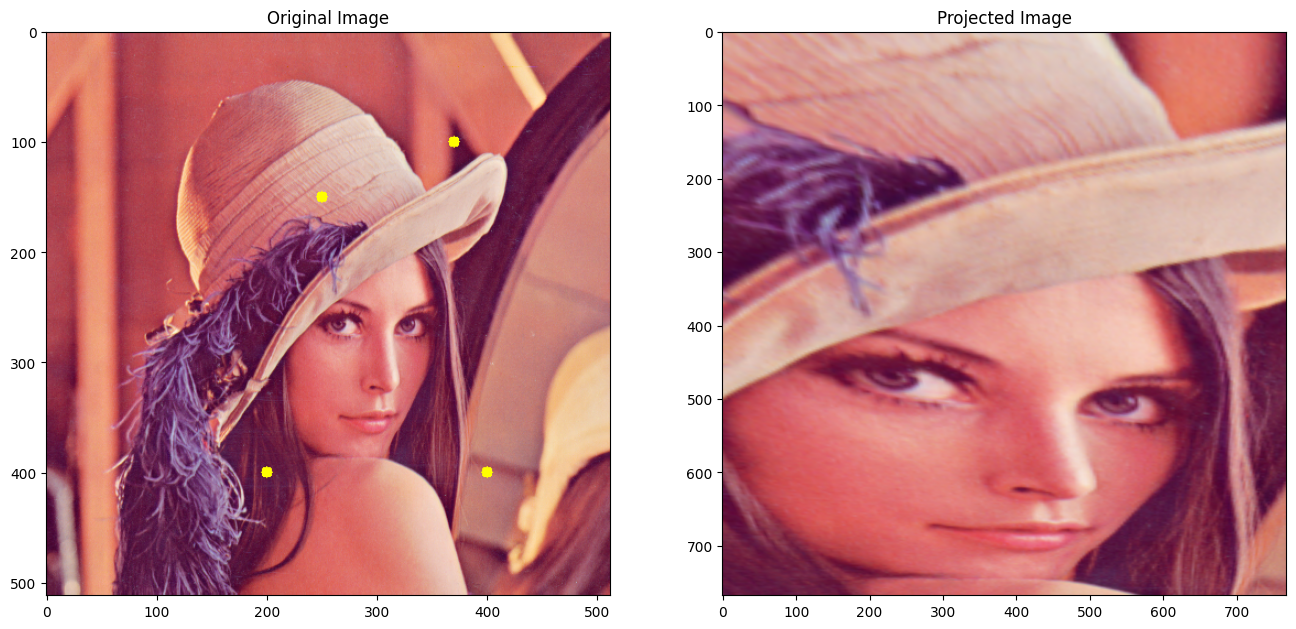

In [139]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(img_ori)
plt.subplot(122)
plt.title("Projected Image")
plt.imshow(img_rgb)

##### Morphological Transformation

In [141]:
img_gray = cv2.imread('images/lenna.png', 0)  # Load image

In [142]:
img_gray.shape

(512, 512)

In [143]:
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

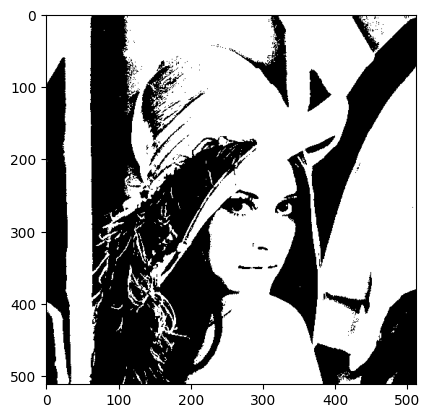

In [145]:
plt.imshow(thresh, cmap = 'gray')

In [146]:
# Erosion - Remove noise
img_erod = cv2.erode(thresh, np.ones((3,3), np.uint8))

In [147]:
# Delation - expand objects
img_dil = cv2.dilate(thresh, np.ones((3,3), np.uint8))

In [148]:
# Closing - fill small holes
img_clo = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

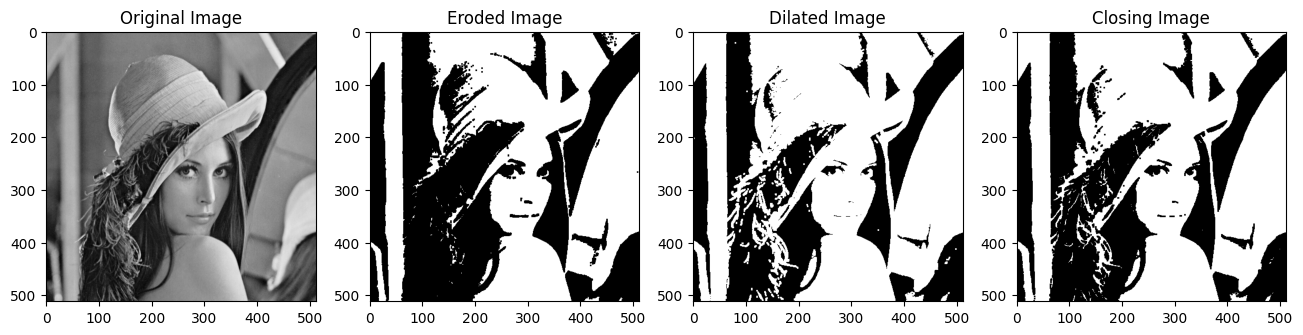

In [149]:
plt.figure(figsize=(16,8))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(img_gray, cmap = 'gray')
plt.subplot(142)
plt.title("Eroded Image")
plt.imshow(img_erod, cmap = "gray")
plt.subplot(143)
plt.title("Dilated Image")
plt.imshow(img_dil, cmap = "gray")
plt.subplot(144)
plt.title("Closing Image")
plt.imshow(img_clo, cmap = "gray")